In [33]:
# common stats analysis stack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import pingouin as pg

#scikit learn
from sklearn.linear_model import LogisticRegression

# formulat interface to statsmodels (standard linear models)
import statsmodels.api as sm
import statsmodels.formula.api as smf
# BAyesian Model-building Interface (BAMBI)
import bambi as bmb
import arviz as az

# for printing pretty tables and plots
from tabulate import tabulate
from  matplotlib.ticker import FuncFormatter, MaxNLocator

# some stuff for making notebooks look nice
from IPython.core.display import HTML, Markdown, display

# seed RNG
np.random.seed(0)

# hate these things
import warnings
warnings.filterwarnings("ignore")

# display all columns of dataframes
pd.set_option('display.max_columns', None)

# display x rows of dataframes
pd.set_option('display.max_rows', 30) # set to None to show all rows

# import the data
exp_df = pd.read_csv("cleandata/exp-05-05-2022.csv")
qdf = pd.read_csv("cleandata/q-05-05-2022.csv")

## Mixed logistic regression

### Experiment 1

In [2]:
# experiment 1 (0)
df = exp_df.loc[(exp_df["expNum"]==0) & (exp_df["phase"]=="test")] 
df = df[["subjid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
df["hit"] = df["hitormiss"].astype(int)
new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# display(new_df)
df[["ruletype2","ruletype3","ruletype4","ruletype5","ruletype6"]]=new_df
display(df)

,subjid,phase,ruleInt,trial,incentive,hitormiss,rt,hit,ruletype2,ruletype3,ruletype4,ruletype5,ruletype6
16,0,test,4.0,17.0,2.0,False,14843.0,0,0,0,1,0,0
17,0,test,4.0,18.0,2.0,True,39370.0,1,0,0,1,0,0
18,0,test,4.0,19.0,2.0,False,14854.0,0,0,0,1,0,0
19,0,test,4.0,20.0,2.0,True,8768.0,1,0,0,1,0,0
20,0,test,4.0,21.0,2.0,True,3635.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,425,test,4.0,20.0,16.0,True,3166.0,1,0,0,1,0,0
10446,425,test,4.0,21.0,16.0,True,2205.0,1,0,0,1,0,0
10447,425,test,4.0,22.0,16.0,True,2311.0,1,0,0,1,0,0
10448,425,test,4.0,23.0,16.0,True,3375.0,1,0,0,1,0,0


In [5]:
# ------- performance by rule
print("Performance by rule")

model = bmb.Model('hit ~ ruletype2 + ruletype3 + ruletype4 + ruletype5 + ruletype6', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Performance by rule


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, ruletype6, ruletype5, ruletype4, ruletype3, ruletype2, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.921,0.017,0.888,0.954,0.000,0.0,1639.0,2250.0,1.0,0.922,0.012
ruletype2,-0.149,0.024,-0.194,-0.103,0.001,0.0,2152.0,2934.0,1.0,-0.149,0.016
ruletype3,-0.209,0.025,-0.255,-0.161,0.001,0.0,2112.0,2824.0,1.0,-0.209,0.017
ruletype4,-0.141,0.025,-0.186,-0.095,0.001,0.0,2011.0,2985.0,1.0,-0.140,0.016
ruletype5,-0.142,0.025,-0.191,-0.095,0.001,0.0,2085.0,2539.0,1.0,-0.142,0.017
ruletype6,-0.264,0.024,-0.311,-0.221,0.001,0.0,2185.0,2637.0,1.0,-0.264,0.017
hit_sigma,0.414,0.005,0.404,0.423,0.000,0.0,3757.0,3227.0,1.0,0.413,0.003


In [6]:
# ------- performance by incentive and rule
print("Performance by incentive")


model = bmb.Model('hit ~ incentive +  ruletype2 + ruletype3 + ruletype4 + ruletype5 + ruletype6', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Performance by incentive


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, ruletype6, ruletype5, ruletype4, ruletype3, ruletype2, incentive, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.927,0.021,0.887,0.965,0.000,0.0,1926.0,2445.0,1.0,0.926,0.014
incentive,-0.000,0.001,-0.001,0.001,0.000,0.0,3537.0,3256.0,1.0,-0.000,0.000
ruletype2,-0.149,0.025,-0.197,-0.103,0.001,0.0,2197.0,2839.0,1.0,-0.149,0.017
ruletype3,-0.209,0.026,-0.258,-0.161,0.001,0.0,2132.0,2563.0,1.0,-0.209,0.017
ruletype4,-0.141,0.025,-0.188,-0.096,0.001,0.0,2284.0,2823.0,1.0,-0.141,0.017
ruletype5,-0.143,0.026,-0.193,-0.094,0.001,0.0,2275.0,2556.0,1.0,-0.143,0.017
ruletype6,-0.265,0.025,-0.313,-0.220,0.001,0.0,2085.0,2923.0,1.0,-0.264,0.016
hit_sigma,0.414,0.005,0.405,0.424,0.000,0.0,3858.0,2856.0,1.0,0.413,0.003


In [7]:
# ------- response time
print("Response time by incentive")

model = bmb.Model('rt ~ incentive +  ruletype2 + ruletype3 + ruletype4 + ruletype5 + ruletype6', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Response time by incentive


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [rt_sigma, ruletype6, ruletype5, ruletype4, ruletype3, ruletype2, incentive, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,1751.606,224.938,1329.159,2177.157,5.131,3.641,1920.0,2569.0,1.0,1751.020,155.520
incentive,-0.113,6.668,-12.757,12.099,0.108,0.099,3842.0,3167.0,1.0,-0.076,4.556
ruletype2,774.170,265.900,280.208,1266.865,5.765,4.231,2136.0,2946.0,1.0,772.994,178.437
ruletype3,1152.422,276.851,635.941,1685.410,5.803,4.123,2280.0,2974.0,1.0,1145.634,185.365
ruletype4,1302.795,264.266,796.980,1788.633,5.577,3.944,2243.0,2988.0,1.0,1297.661,175.418
ruletype5,1567.180,284.618,1009.919,2071.905,6.136,4.366,2151.0,2825.0,1.0,1569.993,192.392
ruletype6,1337.490,260.932,827.104,1818.158,5.629,3.981,2148.0,2734.0,1.0,1345.561,172.157
rt_sigma,4576.957,56.717,4465.936,4678.996,0.769,0.544,5436.0,3359.0,1.0,4575.550,36.322


### Experiment 2

In [9]:
# experiment 2
print("EXPERIMENT 2")

df = exp_df.loc[(exp_df["expNum"]==1) & (exp_df["phase"]=="test")] 
df = df[["subjid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
df["hit"] = df["hitormiss"].astype(int)
new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# display(new_df)
# newnewdf = df.merge(new_df)
df[["ruletype4"]]=new_df
display(df)

# ------- performance by incentive

model = bmb.Model('hit ~ incentive + ruletype4', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)


EXPERIMENT 2


,subjid,phase,ruleInt,trial,incentive,hitormiss,rt,hit,ruletype4
10483,0,test,2.0,33.0,2.0,True,7737.0,1,0
10484,0,test,2.0,34.0,2.0,True,1933.0,1,0
10485,0,test,2.0,35.0,2.0,False,1665.0,0,0
10486,0,test,2.0,36.0,2.0,True,3306.0,1,0
10487,0,test,2.0,37.0,2.0,False,3006.0,0,0
...,...,...,...,...,...,...,...,...,...
14425,99,test,2.0,36.0,32.0,True,1869.0,1,0
14426,99,test,2.0,37.0,32.0,True,2098.0,1,0
14427,99,test,2.0,38.0,32.0,True,1713.0,1,0
14428,99,test,2.0,39.0,32.0,True,1164.0,1,0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, ruletype4, incentive, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.862,0.023,0.820,0.905,0.0,0.0,7035.0,2949.0,1.0,0.862,0.015
incentive,-0.002,0.001,-0.004,-0.001,0.0,0.0,6948.0,3091.0,1.0,-0.002,0.001
ruletype4,0.060,0.026,0.011,0.109,0.0,0.0,7095.0,2805.0,1.0,0.060,0.018
hit_sigma,0.357,0.009,0.340,0.375,0.0,0.0,6435.0,3109.0,1.0,0.357,0.006


In [10]:
# ------- reaction time

model = bmb.Model('rt ~ incentive + ruletype4', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [rt_sigma, ruletype4, incentive, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,2436.593,247.996,2000.868,2918.279,2.908,2.071,7260.0,2835.0,1.0,2431.294,170.823
incentive,14.802,9.161,-3.823,30.733,0.107,0.092,7234.0,3041.0,1.0,14.763,6.077
ruletype4,-86.982,276.623,-615.222,403.618,3.286,3.920,7089.0,3144.0,1.0,-88.397,186.310
rt_sigma,3727.356,97.333,3545.976,3908.863,1.212,0.860,6497.0,2822.0,1.0,3725.396,65.215


### Experiment 3

In [11]:
# experiment 3

df = exp_df.loc[(exp_df["expNum"]==2) * (exp_df["phase"]=="test")] 
df = df[["subjid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
df["hit"] = df["hitormiss"].astype(int)
new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# newnewdf = df.merge(new_df)
df[["ruletype4"]]=new_df
display(df)

# ------- performance by incentive

model = bmb.Model('hit ~ incentive + ruletype4', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

,subjid,phase,ruleInt,trial,incentive,hitormiss,rt,hit,ruletype4
14463,0,test,2.0,33.0,32.0,False,6118.0,0,0
14464,0,test,2.0,34.0,32.0,True,5545.0,1,0
14465,0,test,2.0,35.0,32.0,False,8008.0,0,0
14466,0,test,2.0,36.0,32.0,False,3948.0,0,0
14467,0,test,2.0,37.0,32.0,False,5984.0,0,0
...,...,...,...,...,...,...,...,...,...
18239,99,test,2.0,36.0,32.0,True,2122.0,1,0
18240,99,test,2.0,37.0,32.0,True,885.0,1,0
18241,99,test,2.0,38.0,32.0,True,1066.0,1,0
18242,99,test,2.0,39.0,32.0,True,923.0,1,0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, ruletype4, incentive, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.873,0.026,0.824,0.920,0.0,0.0,6009.0,3138.0,1.0,0.873,0.018
incentive,-0.001,0.001,-0.003,0.001,0.0,0.0,6518.0,3033.0,1.0,-0.001,0.001
ruletype4,-0.067,0.029,-0.117,-0.013,0.0,0.0,7317.0,3084.0,1.0,-0.066,0.020
hit_sigma,0.381,0.010,0.362,0.399,0.0,0.0,6561.0,3091.0,1.0,0.381,0.007


In [12]:
# ------- reaction time

model = bmb.Model('rt ~ incentive + ruletype4', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [rt_sigma, ruletype4, incentive, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 51 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,3291.526,330.135,2679.330,3909.637,4.032,2.851,6723.0,2982.0,1.0,3295.928,227.309
incentive,14.090,12.129,-9.015,36.403,0.159,0.139,5786.0,3095.0,1.0,14.147,8.247
ruletype4,-761.253,357.880,-1395.274,-73.194,4.247,3.473,7112.0,2619.0,1.0,-754.731,240.047
rt_sigma,4925.742,129.446,4684.626,5165.335,1.585,1.121,6624.0,2533.0,1.0,4924.519,86.828


### Experiment 4

WITHIN SUBJECTS. Each subj performs 4 blocks. Low vs High incentive crossed with Rule type II and IV.

TODO: This regression needs to consider the subject-level data accounting for the within design

In [13]:
# experiment 4

# WITHIN SUBJECTS, so data frame looks a little different - each subject does 4 blocks

df = exp_df.loc[(exp_df["expNum"]==3) * (exp_df["phase"]=="test")]
df = df[["subjid","phase","ruleInt","trial","ticketvalue","hitormiss","game","rt"]]
df["hit"] = df["hitormiss"].astype(int)
new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# newnewdf = df.merge(new_df)
df[["ruletype4"]]=new_df
display(df)

,subjid,phase,ruleInt,trial,ticketvalue,hitormiss,game,rt,hit,ruletype4
18277,0,test,2.0,33.0,0.02,True,0.0,3769.0,1,0
18278,0,test,2.0,34.0,0.02,True,0.0,2462.0,1,0
18279,0,test,2.0,35.0,0.02,True,0.0,1176.0,1,0
18280,0,test,2.0,36.0,0.02,True,0.0,1137.0,1,0
18281,0,test,2.0,37.0,0.02,True,0.0,642.0,1,0
...,...,...,...,...,...,...,...,...,...,...
23323,35,test,2.0,156.0,0.02,True,3.0,4412.0,1,0
23324,35,test,2.0,157.0,0.02,True,3.0,11860.0,1,0
23325,35,test,2.0,158.0,0.02,True,3.0,3562.0,1,0
23326,35,test,2.0,159.0,0.02,True,3.0,1004.0,1,0


In [14]:
# ------- performance by game

model = bmb.Model('hit ~ game + (game|subjid)', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, game|subjid_offset, game|subjid_sigma, 1|subjid_offset, 1|subjid_sigma, game, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 107 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.763,0.038,0.690,0.834,0.001,0.001,1362.0,1819.0,1.0,0.762,0.024
game,0.004,0.014,-0.020,0.031,0.000,0.000,2765.0,2019.0,1.0,0.005,0.009
1|subjid_sigma,0.178,0.030,0.125,0.236,0.001,0.001,1094.0,1607.0,1.0,0.176,0.019
1|subjid[0],0.177,0.083,0.027,0.334,0.002,0.001,2440.0,2572.0,1.0,0.177,0.056
1|subjid[1],-0.025,0.083,-0.186,0.123,0.002,0.001,2193.0,1594.0,1.0,-0.024,0.056
...,...,...,...,...,...,...,...,...,...,...,...
game|subjid[27],-0.014,0.035,-0.082,0.052,0.001,0.001,3794.0,2544.0,1.0,-0.012,0.022
game|subjid[28],0.011,0.035,-0.052,0.084,0.001,0.001,3488.0,2428.0,1.0,0.009,0.022
game|subjid[29],0.011,0.036,-0.053,0.085,0.001,0.001,3624.0,2214.0,1.0,0.009,0.021
game|subjid[30],0.020,0.036,-0.047,0.087,0.001,0.001,2300.0,2116.0,1.0,0.017,0.023


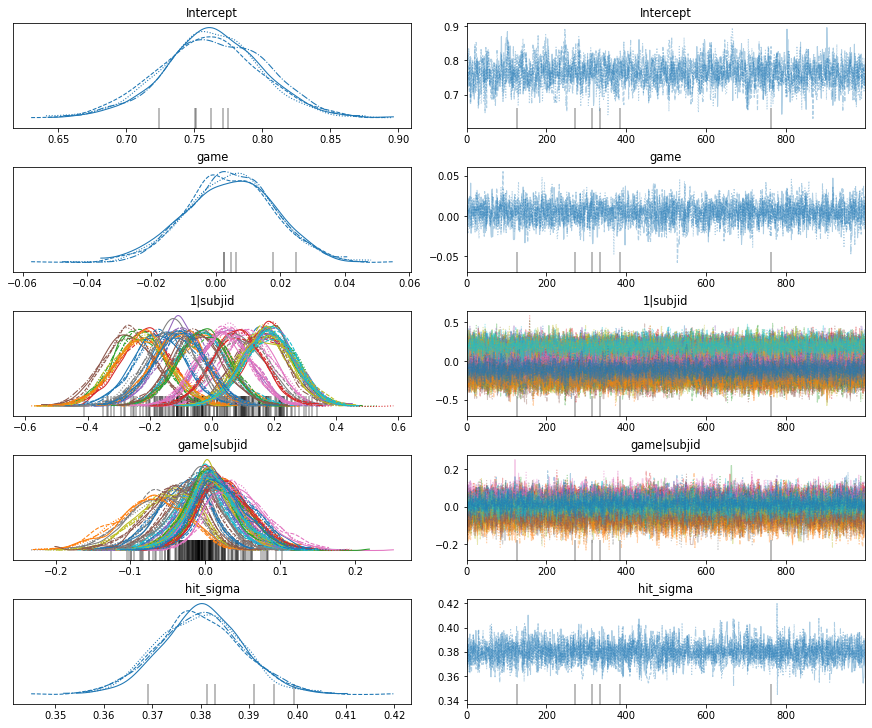

In [15]:
# Plot posteriors
az.plot_trace(
    results,
    var_names=["Intercept", "game", "1|subjid", "game|subjid", "hit_sigma"],
    compact=True,
);

In [16]:
az.summary(results, var_names=["Intercept", "game", "1|subjid", "game|subjid", "hit_sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.763,0.038,0.690,0.834,0.001,0.001,1362.0,1819.0,1.0
game,0.004,0.014,-0.020,0.031,0.000,0.000,2765.0,2019.0,1.0
1|subjid[0],0.177,0.083,0.027,0.334,0.002,0.001,2440.0,2572.0,1.0
1|subjid[1],-0.025,0.083,-0.186,0.123,0.002,0.001,2193.0,1594.0,1.0
1|subjid[2],0.188,0.084,0.030,0.340,0.002,0.001,2711.0,2276.0,1.0
...,...,...,...,...,...,...,...,...,...
game|subjid[27],-0.014,0.035,-0.082,0.052,0.001,0.001,3794.0,2544.0,1.0
game|subjid[28],0.011,0.035,-0.052,0.084,0.001,0.001,3488.0,2428.0,1.0
game|subjid[29],0.011,0.036,-0.053,0.085,0.001,0.001,3624.0,2214.0,1.0
game|subjid[30],0.020,0.036,-0.047,0.087,0.001,0.001,2300.0,2116.0,1.0


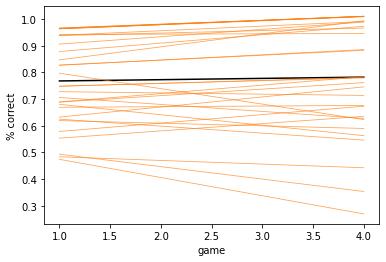

In [17]:
game = np.array([1,4])

intercept_common = results.posterior["Intercept"].stack(draws=("chain", "draw"))
slope_common = results.posterior["game"].stack(draws=("chain", "draw"))

intercept_group_specific = results.posterior["1|subjid"].stack(draws=("chain", "draw"))
slope_group_specific = results.posterior["game|subjid"].stack(draws=("chain", "draw"))
a = (intercept_common.mean() + intercept_group_specific.mean(axis=1)).values
b = (slope_common.mean() + slope_group_specific.mean(axis=1)).values
plt.plot(game, a + b * game[:, None], color="C1", alpha=0.7, lw=0.8)
plt.plot(game, a.mean() + b.mean() * game, color="black", zorder=1)
plt.ylabel("% correct")
plt.xlabel("game");


In [18]:
# ------- performance by incentive

model = bmb.Model('hit ~ ticketvalue + (ticketvalue|subjid) + ruletype4 + (ruletype4|subjid)', df)
results = model.fit(draws=1000, chains=4)
# results = model.fit('hit ~ ticketvalue + (ticketvalue|subjid)', draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, ruletype4|subjid_offset, ruletype4|subjid_sigma, ticketvalue|subjid_offset, ticketvalue|subjid_sigma, 1|subjid_offset, 1|subjid_sigma, ruletype4, ticketvalue, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 122 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.784,0.042,0.703,0.862,0.001,0.001,1273.0,1456.0,1.0,0.784,0.028
ticketvalue,-0.003,0.020,-0.040,0.035,0.000,0.000,4672.0,2517.0,1.0,-0.003,0.013
ruletype4,-0.026,0.036,-0.089,0.043,0.001,0.001,2313.0,2196.0,1.0,-0.026,0.024
1|subjid_sigma,0.202,0.032,0.143,0.262,0.001,0.001,1281.0,1766.0,1.0,0.199,0.022
1|subjid[0],0.176,0.085,0.018,0.333,0.002,0.001,2892.0,2151.0,1.0,0.176,0.058
...,...,...,...,...,...,...,...,...,...,...,...
ruletype4|subjid[27],-0.035,0.095,-0.214,0.142,0.001,0.001,4213.0,2850.0,1.0,-0.033,0.063
ruletype4|subjid[28],0.035,0.091,-0.137,0.207,0.002,0.001,3417.0,2749.0,1.0,0.033,0.060
ruletype4|subjid[29],0.034,0.092,-0.147,0.208,0.001,0.001,3842.0,2811.0,1.0,0.032,0.057
ruletype4|subjid[30],-0.113,0.099,-0.311,0.061,0.002,0.001,3554.0,3166.0,1.0,-0.109,0.066


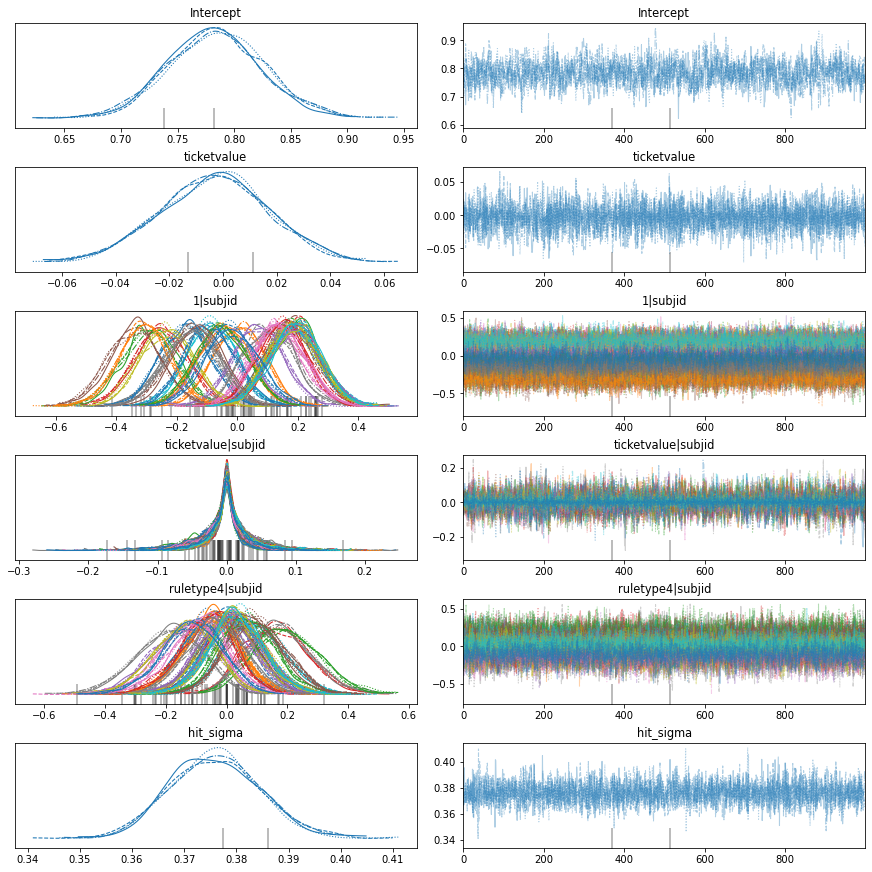

In [19]:
# Plot posteriors
az.plot_trace(
    results,
    var_names=["Intercept", "ticketvalue", "1|subjid", "ticketvalue|subjid", "ruletype4|subjid", "hit_sigma"],
    compact=True,
);

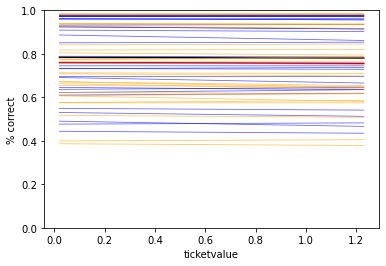

In [20]:
ticketvalue = np.array(df["ticketvalue"].unique())

intercept_common = results.posterior["Intercept"].stack(draws=("chain", "draw"))
b_slope_common = results.posterior["ticketvalue"].stack(draws=("chain", "draw"))
c_slope_common = results.posterior["ruletype4"].stack(draws=("chain", "draw"))

intercept_group_specific = results.posterior["1|subjid"].stack(draws=("chain", "draw"))
b_slope_group_specific = results.posterior["ticketvalue|subjid"].stack(draws=("chain", "draw"))
c_slope_group_specific = results.posterior["ruletype4|subjid"].stack(draws=("chain", "draw"))

a = (intercept_common.mean() + intercept_group_specific.mean(axis=1)).values
b = (b_slope_common.mean() + b_slope_group_specific.mean(axis=1)).values
c = (c_slope_common.mean() + c_slope_group_specific.mean(axis=1)).values

plt.plot(ticketvalue, a + b * ticketvalue[:, None] + c*0, color="blue", alpha=0.6, lw=0.8)
plt.plot(ticketvalue, a + b * ticketvalue[:, None] + c*1, color="orange", alpha=0.6, lw=0.8)
plt.plot(ticketvalue, a.mean() + b.mean() * ticketvalue + c.mean()*0, color="black", zorder=1)
plt.plot(ticketvalue, a.mean() + b.mean() * ticketvalue + c.mean()*1, color="red", zorder=1)

plt.ylim([0.0,1.0])


plt.ylabel("% correct")
plt.xlabel("ticketvalue");

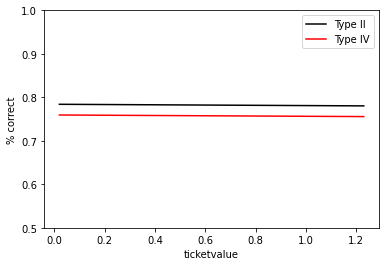

In [21]:
fig, ax = plt.subplots()

# Let's use seaborn this time!

plt.plot(ticketvalue, a.mean() + b.mean() * ticketvalue + c.mean()*0, color="black", zorder=1)
plt.plot(ticketvalue, a.mean() + b.mean() * ticketvalue + c.mean()*1, color="red", zorder=1)

plt.ylim([0.5,1.0])
plt.legend(["Type II", "Type IV"])

plt.ylabel("% correct")
plt.xlabel("ticketvalue");

In [22]:
# az.plot_hdi()

In [23]:
bonus_df = exp_df.loc[(exp_df["expNum"]==3) & (exp_df["phase"]=="bonus") & (exp_df["game"]==3)][["subjid","totalbonustodate"]]
# bonus_df.groupby("subjid").mean("bonus")
print("N= ",len(bonus_df))
print("Mean total bonus: " ,bonus_df["totalbonustodate"].mean())
print("bonus std: ", bonus_df["totalbonustodate"].std())

N=  31
Mean total bonus:  5.808387096774194
bonus std:  3.263170336522642


In [24]:
lowdf = df[["subjid","hit"]].loc[df["ticketvalue"]==0.02]
lowdf = lowdf.rename(columns={"hit": "low_hit"})
highdf = df[["subjid","hit"]].loc[df["ticketvalue"]==1.23]
highdf = highdf.rename(columns={"hit": "high_hit"})
newdf = pd.merge(lowdf,highdf, on="subjid")
newdf

,subjid,low_hit,high_hit
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
...,...,...,...
7931,35,1,0
7932,35,1,1
7933,35,1,1
7934,35,1,1


In [30]:
ttest_results = pg.ttest(newdf["low_hit"], newdf["high_hit"], paired=True, alternative="less")
ttest_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.665777,7935,less,0.747213,"[-inf, 0.01]",0.009583,0.032,0.006236


In [31]:
# stats = pg.ttest(df["hit"].loc[(df["ticketvalue"]==0.02) & (df["ruletype4"]==0)], df["hit"].loc[(df["ticketvalue"]==1.23) & (df["ruletype4"]==0)], paired=True, alternative="less")
# stats

ttest_results = pg.ttest(df["hit"].loc[(df["ticketvalue"]==0.02) & (df["ruletype4"]==1)], df["hit"].loc[(df["ticketvalue"]==1.23) & (df["ruletype4"]==1)], paired=True, alternative="less")
ttest_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.223178,247,less,0.588209,"[-inf, 0.07]",0.018794,0.146,0.026189


In [32]:
ttest_results = pg.ttest(df["hit"].loc[(df["ticketvalue"]==0.02) & (df["ruletype4"]==0)], df["hit"].loc[(df["ticketvalue"]==1.23) & (df["ruletype4"]==0)], paired=True, alternative="less")
ttest_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,247,less,0.5,"[-inf, 0.05]",0.0,0.142,0.05


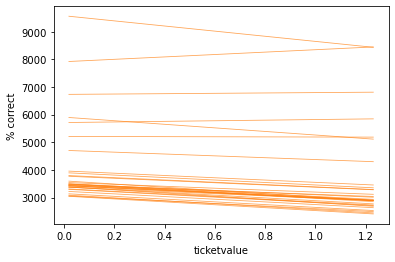

In [34]:
# game = np.array([1,4])
ticketvalue = np.array(df["ticketvalue"].unique())

intercept_common = results.posterior["Intercept"].stack(draws=("chain", "draw"))
slope_common = results.posterior["ticketvalue"].stack(draws=("chain", "draw"))

intercept_group_specific = results.posterior["1|subjid"].stack(draws=("chain", "draw"))
slope_group_specific = results.posterior["ticketvalue|subjid"].stack(draws=("chain", "draw"))
a = (intercept_common.mean() + intercept_group_specific.mean(axis=1)).values
b = (slope_common.mean() + slope_group_specific.mean(axis=1)).values
plt.plot(ticketvalue, a + b * ticketvalue[:, None], color="C1", alpha=0.7, lw=0.8)
plt.ylabel("% correct")
plt.xlabel("ticketvalue");


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [rt_sigma, ticketvalue|subjid_offset, ticketvalue|subjid_sigma, 1|subjid_offset, 1|subjid_sigma, ticketvalue, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 80 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,4133.115,939.065,2416.889,5995.729,19.798,14.001,2255.0,2174.0,1.0,4127.861,610.908
ticketvalue,-379.933,961.546,-2129.504,1466.692,17.099,15.228,3197.0,2140.0,1.0,-402.806,658.056
1|subjid_sigma,2561.773,963.519,696.745,4418.973,35.945,25.427,720.0,609.0,1.0,2585.566,609.041
1|subjid[0],-803.987,2025.990,-4295.779,3290.668,37.861,35.939,2988.0,2373.0,1.0,-613.462,1245.103
1|subjid[1],-568.509,2015.018,-4665.111,3095.740,35.860,34.338,3232.0,2339.0,1.0,-454.020,1239.105
...,...,...,...,...,...,...,...,...,...,...,...
ticketvalue|subjid[27],-147.776,1174.631,-2564.023,2084.930,27.563,19.900,2150.0,2164.0,1.0,-41.635,475.859
ticketvalue|subjid[28],80.297,1172.681,-2057.992,2661.570,23.489,18.036,2578.0,1795.0,1.0,21.719,493.460
ticketvalue|subjid[29],-44.313,1152.653,-2208.539,2462.482,25.418,21.229,2262.0,2221.0,1.0,-10.214,479.241
ticketvalue|subjid[30],-6.552,1206.534,-2475.712,2391.368,26.389,21.763,2644.0,1692.0,1.0,-8.581,490.992


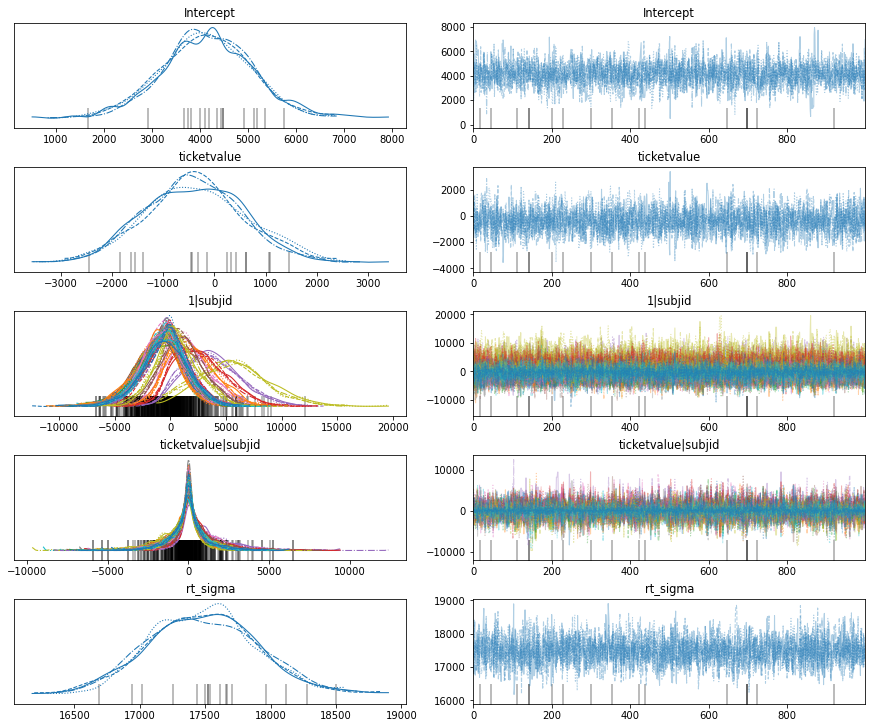

In [35]:
# ------- rt by incentive

model = bmb.Model('rt ~ ticketvalue + (ticketvalue|subjid)', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

# Plot posteriors
az.plot_trace(
    results,
    var_names=["Intercept", "ticketvalue", "1|subjid", "ticketvalue|subjid", "rt_sigma"],
    compact=True,
);

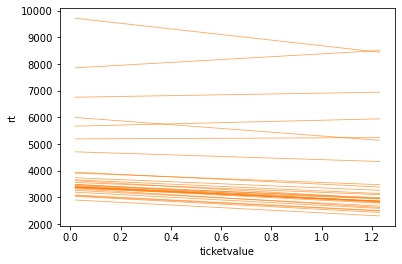

In [36]:
# game = np.array([1,4])
ticketvalue = np.array(df["ticketvalue"].unique())

intercept_common = results.posterior["Intercept"].stack(draws=("chain", "draw"))
slope_common = results.posterior["ticketvalue"].stack(draws=("chain", "draw"))

intercept_group_specific = results.posterior["1|subjid"].stack(draws=("chain", "draw"))
slope_group_specific = results.posterior["ticketvalue|subjid"].stack(draws=("chain", "draw"))
a = (intercept_common.mean() + intercept_group_specific.mean(axis=1)).values
b = (slope_common.mean() + slope_group_specific.mean(axis=1)).values
plt.plot(ticketvalue, a + b * ticketvalue[:, None], color="C1", alpha=0.7, lw=0.8)
plt.ylabel("rt")
plt.xlabel("ticketvalue");


In [38]:
# # ------- performance by incentive

# model = bmb.Model('hit ~ ticketvalue + ruletype4', df)
# results = model.fit(draws=1000, chains=4)

# func_dict = {"Median": np.median,
#             "MAD_SD":stats.median_abs_deviation,
#              }
# coefs = az.summary(results, stat_funcs=func_dict, extend=True)
# display(coefs)

In [39]:
# # ------- reaction time

# model = bmb.Model('rt ~ ticketvalue + ruletype4', df)
# results = model.fit(draws=1000, chains=4)

# func_dict = {"Median": np.median,
#             "MAD_SD":stats.median_abs_deviation,
#              }
# coefs = az.summary(results, stat_funcs=func_dict, extend=True)
# display(coefs)

### Experiment 5

category recognition task (no discovery)
once again, incentive is varied within subject

In [41]:
# experiment 5

df = exp_df.loc[(exp_df["expNum"]==4) & (exp_df["phase"]=="task")] 
df = df[["subjid","phase","ruleInt","trial","points","hitormiss","rt"]]
df["hit"] = df["hitormiss"].astype(int)
new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# newnewdf = df.merge(new_df)
df[["ruleCondition2","ruleCondition4"]]=new_df
display(df)

# # ------- performance
# print("Exp 5 performance regression")
# model = bmb.Model('hit ~ points + ruleCondition2 + ruleCondition4', df)
# results = model.fit(draws=1000, chains=4)

# func_dict = {"Median": np.median,
#             "MAD_SD":stats.median_abs_deviation,
#              }
# coefs = az.summary(results, stat_funcs=func_dict, extend=True)
# display(coefs)

# # ------- reaction time
# print("Exp 5 response time regression")
# model = bmb.Model('rt ~ points + ruleCondition2 + ruleCondition4', df)
# results = model.fit(draws=1000, chains=4)

# func_dict = {"Median": np.median,
#             "MAD_SD":stats.median_abs_deviation,
#              }
# coefs = az.summary(results, stat_funcs=func_dict, extend=True)
# display(coefs)

,subjid,phase,ruleInt,trial,points,hitormiss,rt,hit,ruleCondition2,ruleCondition4
23329,0,task,1.0,0.0,16.0,True,26054.0,1,0,0
23330,0,task,1.0,1.0,2.0,True,20040.0,1,0,0
23331,0,task,1.0,2.0,1.0,True,15873.0,1,0,0
23332,0,task,1.0,3.0,2.0,True,21300.0,1,0,0
23333,0,task,1.0,4.0,4.0,True,15639.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
31523,209,task,2.0,35.0,8.0,False,13084.0,0,1,0
31524,209,task,2.0,36.0,0.0,True,5232.0,1,1,0
31525,209,task,2.0,37.0,2.0,False,11377.0,0,1,0
31526,209,task,2.0,38.0,2.0,True,12059.0,1,1,0



## redo exp 5 analysis with corrected rule 2 data

march 2022

In [42]:
def get_moreA_CORRECTED(row):
    moreA_CORRECTED = row["moreA"]
    if row["rule"]==1:
        if row["dimvals"] in [1,2,5,6]:
            moreA_CORRECTED = not row["moreA"]
        
    return moreA_CORRECTED

df = exp_df.loc[(exp_df["expNum"]==4) & (exp_df["phase"]=="task")] 

# "moreA_CORRECTED" = True if allcards has more A cards than B cards
df["moreA_CORRECTED"] = df.apply(lambda row: get_moreA_CORRECTED(row), axis=1)

# "correct_CORRECTED" = 0 if moreA==True
df["correct_CORRECTED"] = df.apply(lambda row: 0 if row["moreA_CORRECTED"] else 1, axis=1)

# "hitormiss_CORRECTED" = True if resp == correct_CORRECTED
df["hitormiss_CORRECTED"] = df.apply(lambda row: row["resp"]==row["correct_CORRECTED"], axis=1)

df = df[["subjid","phase","ruleInt","trial","points","hitormiss_CORRECTED","rt"]]
df["hit"] = df["hitormiss_CORRECTED"].astype(int)

new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# newnewdf = df.merge(new_df)
df[["ruleCondition2","ruleCondition4"]]=new_df
display(df)

,subjid,phase,ruleInt,trial,points,hitormiss_CORRECTED,rt,hit,ruleCondition2,ruleCondition4
23329,0,task,1.0,0.0,16.0,True,26054.0,1,0,0
23330,0,task,1.0,1.0,2.0,True,20040.0,1,0,0
23331,0,task,1.0,2.0,1.0,True,15873.0,1,0,0
23332,0,task,1.0,3.0,2.0,True,21300.0,1,0,0
23333,0,task,1.0,4.0,4.0,True,15639.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
31523,209,task,2.0,35.0,8.0,False,13084.0,0,1,0
31524,209,task,2.0,36.0,0.0,True,5232.0,1,1,0
31525,209,task,2.0,37.0,2.0,True,11377.0,1,1,0
31526,209,task,2.0,38.0,2.0,True,12059.0,1,1,0


In [43]:
# ------- performance
print("Exp 5 performance regression")
model = bmb.Model('hit ~ points + (points|subjid) + ruleCondition2 + ruleCondition4', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

# ------- reaction time
print("Exp 5 response time regression")
model = bmb.Model('rt ~ points + (points|subjid) + ruleCondition2 + ruleCondition4', df)
results = model.fit(draws=1000, chains=4)

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
display(coefs)

Exp 5 performance regression


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_sigma, points|subjid_offset, points|subjid_sigma, 1|subjid_offset, 1|subjid_sigma, ruleCondition4, ruleCondition2, points, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 272 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,0.723,0.025,0.677,0.771,0.001,0.001,400.0,743.0,1.01,0.724,0.017
points,0.003,0.001,0.002,0.005,0.000,0.000,2517.0,1421.0,1.00,0.003,0.000
ruleCondition2,-0.032,0.035,-0.095,0.034,0.002,0.001,440.0,827.0,1.01,-0.031,0.023
ruleCondition4,-0.078,0.035,-0.146,-0.013,0.002,0.001,470.0,560.0,1.01,-0.077,0.023
1|subjid_sigma,0.195,0.011,0.175,0.216,0.000,0.000,656.0,985.0,1.00,0.194,0.007
...,...,...,...,...,...,...,...,...,...,...,...
points|subjid[196],0.000,0.002,-0.003,0.005,0.000,0.000,1506.0,861.0,1.00,0.000,0.001
points|subjid[197],0.000,0.002,-0.003,0.004,0.000,0.000,1891.0,1145.0,1.00,0.000,0.001
points|subjid[198],-0.000,0.002,-0.004,0.003,0.000,0.000,2001.0,1716.0,1.01,-0.000,0.001
points|subjid[199],0.000,0.002,-0.003,0.004,0.000,0.000,1538.0,890.0,1.00,0.000,0.001


Exp 5 response time regression


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [rt_sigma, points|subjid_offset, points|subjid_sigma, 1|subjid_offset, 1|subjid_sigma, ruleCondition4, ruleCondition2, points, Intercept]


//anaconda/envs/shj-exp/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 238 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,Median,MAD_SD
Intercept,10910.301,1823.818,7484.549,14271.869,81.534,57.687,501.0,1030.0,1.01,10936.143,1235.848
points,296.579,51.170,202.774,392.901,0.891,0.669,3395.0,2044.0,1.00,296.421,33.559
ruleCondition2,5373.724,2600.388,379.778,10135.321,118.371,84.368,486.0,1137.0,1.01,5364.930,1758.974
ruleCondition4,8918.419,2579.563,3807.731,13344.337,119.691,84.688,461.0,975.0,1.00,8924.383,1798.810
1|subjid_sigma,13767.288,818.139,12344.904,15367.354,30.488,21.567,712.0,1341.0,1.00,13741.254,548.808
...,...,...,...,...,...,...,...,...,...,...,...
points|subjid[196],8.079,167.611,-328.232,351.565,3.814,3.773,2182.0,1535.0,1.00,1.917,73.210
points|subjid[197],-35.131,169.057,-431.229,242.396,5.120,4.193,1507.0,1013.0,1.00,-9.159,73.920
points|subjid[198],-28.152,162.182,-343.725,289.439,4.030,3.894,2108.0,1428.0,1.00,-9.162,71.273
points|subjid[199],3.810,165.613,-321.580,332.349,3.812,3.751,2237.0,1304.0,1.00,2.132,72.157
